In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
import joblib

# Import and split dataset

In [2]:
train_set = pd.read_csv('datasets/mnist_train.csv')
X_train = train_set.iloc[:,1:].values
y_train = train_set.iloc[:,0].values

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split original dataset in 30% for slower models
split = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=42)
for train_idx, test_idx in split.split(train_set, train_set.label):
    strat_train_set = train_set.loc[train_idx]
    strat_test_set = train_set.loc[test_idx]

strat_X_train = strat_train_set.iloc[:,1:].values
strat_y_train = strat_train_set.iloc[:,0].values

<IPython.core.display.Javascript object>


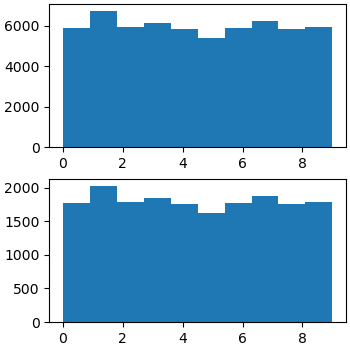

(array([1777., 2023., 1787., 1839., 1753., 1626., 1775., 1880., 1755.,
        1785.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

In [4]:
fig, axs = plt.subplots(2,1,figsize=(3.5,3.5),constrained_layout=True)

axs[0].hist(y_train, bins=10)
axs[1].hist(strat_y_train, bins=10)

In [5]:
plt.close()

# Dataviz

<IPython.core.display.Javascript object>


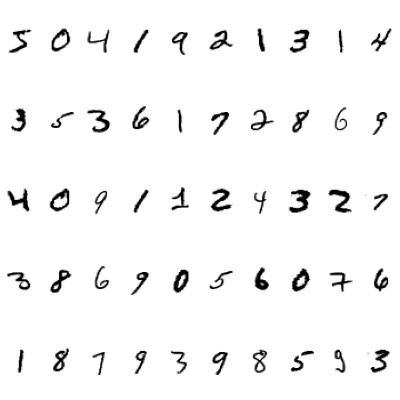

In [6]:
# Show first 25 images

fig, axs = plt.subplots(5,10,figsize=(4,4),constrained_layout=True)

for i,axs in enumerate(axs.flatten()):
    axs.imshow(X_train[i].reshape(28,28), cmap='binary')
    axs.axis('off')
    

In [7]:
plt.close()

# Dimensionality reduction

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA()

<IPython.core.display.Javascript object>


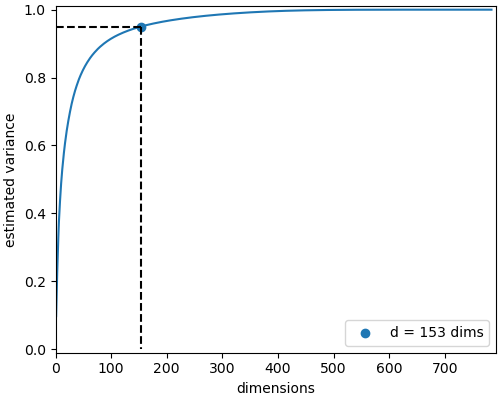

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

fig, axs = plt.subplots(1,1,figsize=(5,4),constrained_layout=True)
axs.plot(np.arange(1,cumsum.size+1), cumsum)
axs.scatter([d],[cumsum[d-1]],marker='o', label=f"d = {d} dims")
axs.plot([0,d],[cumsum[d-1],cumsum[d-1]],'k--')
axs.plot([d,d],[cumsum[d-1],0],'k--')
axs.set_ylim([-0.01,1.01])
axs.set_xlim([-0.01,1.01*cumsum.size])
axs.set_xlabel('dimensions')
axs.set_ylabel('estimated variance')
axs.legend(loc='lower right')

In [10]:
plt.close()

In [11]:
pca = PCA(n_components=d)
pca.fit(X_train)

PCA(n_components=154)

In [ ]:
joblib.dump(pca, 'models/pca_transformer')